## Example Auto-Encoder using Package DNN (Deep Neural Network
Use the Deep Learning Neural Network package, DNN, to create an 
auto-encoder representing a noisy straight line.

### Setup

In [1]:
using Revise

In [2]:
using DNNS

Precompiling DNNS
  ✓ DNNS
  1 dependency successfully precompiled in 2 seconds. 15 already precompiled.
[ Info: Precompiling DNNS [top-level]


In [3]:
using Plots
import Random
import Revise
import LinearAlgebra: dot
gr()

Plots.GRBackend()

### Construct the Auto-Encoder DNN
Create a function that we will use to fit our DNN.

In [4]:
# Parameters use to specify the two layers of the DNN.
N = 100                          
M = 2

# Randomized matrices and bias vectors used for for the two layers.
Random.seed!(1)
M1 = rand(M, N)                                                                 
b1 = rand(M)                                                                    
M2 = rand(N, M)                                                                 
b2 = rand(N)         

# Create an Auto-Encoder 2-layer Deep Neural Network.
dnn = DNN([DLayer(M1, b1, sigmoid1), DLayer(M2, b2, relu)]) 

# Create 1-dimensional grid of 100 points.
x = collect(0.01:0.01:1.0)

# Create a simple linear function on this grid with noise added.
y = 2.0 .* x .+ 1.0 .+ 0.1 .* rand(100)                

# Prepare input data and the its target.
Y = reshape(y, length(y), 1)            

100×1 Matrix{Float64}:
 1.0776693532663644
 1.1142521778709646
 1.145685630112132
 1.0891814893597376
 1.1224594582189937
 1.203915086461872
 1.1568604925936667
 1.216500396155612
 1.199169219795072
 1.216900076082678
 1.2753489461970142
 1.3095114244555546
 1.3241964790787955
 ⋮
 2.8184445341557214
 2.8992545489220687
 2.881463761738071
 2.924550717732365
 2.936109167128446
 2.948616660357163
 2.9547069180398706
 3.0189263989573236
 2.9576017170766393
 3.013072487229114
 2.9924247526437533
 3.090843198613515

### Fit the DNN

In [5]:
# Fit the dnn to this data.
@time fit(dnn, Y, Y, N=5000, relerr=1.0e-4, μ=0.0001, verbose=false)                  

println("y = $y")                                                               
println("dnn(y) = $(map(x -> x.v, dnn(y)))")

Used the maximum nunmber of iterates (5000).
The relchg = 0.0015989603519391228.
 17.327019 seconds (1.82 G allocations: 60.492 GiB, 8.02% gc time, 2.65% compilation time)
y = [1.0776693532663644, 1.1142521778709646, 1.145685630112132, 1.0891814893597376, 1.1224594582189937, 1.203915086461872, 1.1568604925936667, 1.216500396155612, 1.199169219795072, 1.216900076082678, 1.2753489461970142, 1.3095114244555546, 1.3241964790787955, 1.2927696325127547, 1.3394981418635088, 1.4069309875386504, 1.3641452922217137, 1.377797408362989, 1.388739293279531, 1.442543652570048, 1.4260126611337383, 1.5161907090680473, 1.4731801395839366, 1.517068097846662, 1.556568115066532, 1.569985069212027, 1.5494796718912514, 1.6344615213940705, 1.6708340833423792, 1.6964950285208795, 1.6554628018032485, 1.702104323548607, 1.7355907674573772, 1.7559249926602323, 1.736559674465877, 1.7759043962531487, 1.7969431541390783, 1.8286516936135606, 1.7925614899938949, 1.8136304728496395, 1.8236217682904723, 1.90516453659891

### Plot the Results of Auto-Encoder Approximation

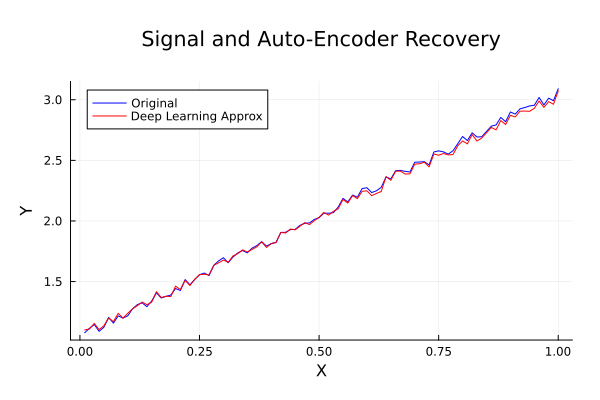

In [6]:
# Do a plot of the original function, y, and the DNN approximation.
plot(x, y, color=:blue, label="Original", title="\nSignal and Auto-Encoder Recovery", xlabel="X", ylabel="Y", top_margin=10Plots.mm, margin=5Plots.mm)
plot!(x, map(x -> x.v, dnn(y)), color=:red, label="Deep Learning Approx")